In [5]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [1]:
import pandas as pd

# Load the datasets
modified_dataset = pd.read_csv('feature_data.csv')
ground_data = pd.read_csv('modified_ground_data.csv')
output_file = pd.read_excel('Modified_NO2_Data.xlsx')

# Correct the column name in the output file
output_file.rename(columns={'ate': 'Date'}, inplace=True)

# Verify the change
print(output_file.head())


         Date           City  Longitude  latitude        NO2
0  2022-01-01  Greater Noida      77.16     28.61  14.573472
1  2022-01-02  Greater Noida      77.19     28.63  17.658675
2  2022-01-03  Greater Noida      77.23     28.67  17.658675
3  2022-01-04  Greater Noida      77.25     28.69  17.658675
4  2022-01-05  Greater Noida      77.29     28.73  17.658675


In [2]:
import pandas as pd

# Load the datasets
modified_dataset = pd.read_csv('feature_data.csv')
ground_data = pd.read_csv('ground_data..csv')
output_file = pd.read_excel('Modified_NO2_Data.xlsx')


# Correct the column name in the output file
output_file.rename(columns={'ate': 'Date'}, inplace=True)

# Verify the change
print(output_file.head())

# Assuming modified_dataset and ground_data need to be merged first.
# Replace with the appropriate DataFrame names and merge operation if necessary
merged_dataset = pd.merge(modified_dataset, ground_data, on=['Date', 'City'], how='inner')

# Check columns in merged_dataset and output_file
print("Columns in merged_dataset:", merged_dataset.columns)
print("Columns in output_file:", output_file.columns)

# If 'City' is missing in either DataFrame, we'll handle it
if 'City' not in merged_dataset.columns or 'City' not in output_file.columns:
    print("The 'City' column is missing in one of the DataFrames. Adjusting merge columns...")

    # Adjust the merging columns based on availability
    merge_columns = ['Date']
    if 'City' in merged_dataset.columns and 'City' in output_file.columns:
        merge_columns.append('City')

    # Merge the datasets based on the available columns
    final_merged_dataset = pd.merge(merged_dataset, output_file, on=merge_columns, how='inner')
else:
    # Merge the datasets on 'Date' and 'City'
    final_merged_dataset = pd.merge(merged_dataset, output_file, on=['Date', 'City'], how='inner')

# Verify the merged dataset
print("Columns in final_merged_dataset:", final_merged_dataset.columns)
print("First few rows of the final merged dataset:")
print(final_merged_dataset.head())

         Date           City  Longitude  latitude        NO2
0  2022-01-01  Greater Noida      77.16     28.61  14.573472
1  2022-01-02  Greater Noida      77.19     28.63  17.658675
2  2022-01-03  Greater Noida      77.23     28.67  17.658675
3  2022-01-04  Greater Noida      77.25     28.69  17.658675
4  2022-01-05  Greater Noida      77.29     28.73  17.658675
Columns in merged_dataset: Index(['Date', 'City', 'Temp', 'wind speed', 'pressure', ' Humidity',
       'NO2_ground'],
      dtype='object')
Columns in output_file: Index(['Date', 'City', 'Longitude', 'latitude', 'NO2'], dtype='object')
Columns in final_merged_dataset: Index(['Date', 'City', 'Temp', 'wind speed', 'pressure', ' Humidity',
       'NO2_ground', 'Longitude', 'latitude', 'NO2'],
      dtype='object')
First few rows of the final merged dataset:
         Date           City  Temp  wind speed  pressure   Humidity  \
0  2022-03-13  Greater Noida  24.2         4.9    1010.4         39   
1  2022-07-01  Greater Noida  28

In [3]:
# Check if 'Humidity' column exists before filling missing values
if 'Humidity' in final_merged_dataset.columns:
  # Fill missing values in 'Humidity' and 'NO2' using the mean
  final_merged_dataset['Humidity'].fillna(final_merged_dataset['Humidity'].mean(), inplace=True)

# Check if 'NO2' column exists before filling missing values
if 'NO2' in final_merged_dataset.columns:
  final_merged_dataset['NO2'].fillna(final_merged_dataset['NO2'].mean(), inplace=True)

# Verify the changes
print(final_merged_dataset.isnull().sum())

Date          0
City          0
Temp          0
wind speed    0
pressure      0
 Humidity     0
NO2_ground    0
Longitude     0
latitude      0
NO2           0
dtype: int64


In [4]:
# Merge modified_dataset with ground_data on 'Date'
merged_dataset = pd.merge(modified_dataset, ground_data, on='Date', how='inner')

# Print some info to check merge results
print(f"Shape of merged_dataset: {merged_dataset.shape}")
print(merged_dataset.head())

# Merge the merged dataset with output_file on 'Date' and 'City'
final_merged_dataset = pd.merge(merged_dataset, output_file, on=['Date'], how='inner')

# Print some info to check merge results
print(f"Shape of final_merged_dataset: {final_merged_dataset.shape}")
print(final_merged_dataset.head())

# Fill missing values in 'Humidity' and 'NO2' ONLY if the column exists and has missing values
if 'Humidity' in final_merged_dataset.columns and final_merged_dataset['Humidity'].isnull().any():
  final_merged_dataset['Humidity'].fillna(final_merged_dataset['Humidity'].mean(), inplace=True)

if 'NO2' in final_merged_dataset.columns and final_merged_dataset['NO2'].isnull().any():
  final_merged_dataset['NO2'].fillna(final_merged_dataset['NO2'].mean(), inplace=True)

# Verify the changes
print(final_merged_dataset.isnull().sum())

Shape of merged_dataset: (161, 8)
         Date         City_x  Temp  wind speed  pressure   Humidity  \
0  2022-03-13  Greater Noida  24.2         4.9    1010.4         39   
1  2022-07-01  Greater Noida  28.5         5.0     998.4         33   
2  2022-07-02  Greater Noida  30.7         5.3     997.0         40   
3  2022-07-03  Greater Noida  31.1         6.3     997.8         56   
4  2022-07-04  Greater Noida  32.6         4.1     997.4         49   

          City_y  NO2_ground  
0  Greater Noida       27.78  
1  Greater Noida       17.40  
2  Greater Noida       11.37  
3  Greater Noida       20.06  
4  Greater Noida       19.37  
Shape of final_merged_dataset: (161, 12)
         Date         City_x  Temp  wind speed  pressure   Humidity  \
0  2022-03-13  Greater Noida  24.2         4.9    1010.4         39   
1  2022-07-01  Greater Noida  28.5         5.0     998.4         33   
2  2022-07-02  Greater Noida  30.7         5.3     997.0         40   
3  2022-07-03  Greater Noida

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the datasets
modified_dataset = pd.read_csv('feature_data.csv')
ground_data = pd.read_csv('modified_ground_data.csv')
output_file = pd.read_excel('Modified_NO2_Data.xlsx')


# Correct the column name in the output file
output_file.rename(columns={'ate': 'Date'}, inplace=True)

# Verify the change
print(output_file.head())

# Merge modified_dataset with ground_data on 'Date'
merged_dataset = pd.merge(modified_dataset, ground_data, on='Date', how='inner')

# Print some info to check merge results
print(f"Shape of merged_dataset: {merged_dataset.shape}")
print(merged_dataset.head())

# Merge the merged dataset with output_file on 'Date'
final_merged_dataset = pd.merge(merged_dataset, output_file, on=['Date'], how='inner')

# Print some info to check merge results
print(f"Shape of final_merged_dataset: {final_merged_dataset.shape}")
print(final_merged_dataset.head())

# Fill missing values in 'Humidity' and 'NO2' ONLY if the column exists and has missing values
if 'Humidity' in final_merged_dataset.columns and final_merged_dataset['Humidity'].isnull().any():
  final_merged_dataset['Humidity'].fillna(final_merged_dataset['Humidity'].mean(), inplace=True)

if 'NO2' in final_merged_dataset.columns and final_merged_dataset['NO2'].isnull().any():
  final_merged_dataset['NO2'].fillna(final_merged_dataset['NO2'].mean(), inplace=True)

# Verify the changes
print(final_merged_dataset.isnull().sum())

# Check if the required columns exist in the DataFrame
required_columns = ['Longitude', 'latitude', 'Temp', 'wind speed', 'pressure', 'Humidity', 'NO2']
missing_columns = set(required_columns) - set(final_merged_dataset.columns)

if missing_columns:
  print(f"Error: The following columns are missing from the DataFrame: {missing_columns}")
else:
  # Define features and target
  features = final_merged_dataset[['Longitude', 'latitude', 'Temp', 'wind speed', 'pressure', 'Humidity']]
  target = final_merged_dataset['NO2']

  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

  # Linear Regression
  lr_model = LinearRegression()
  lr_model.fit(X_train, y_train)
  lr_predictions = lr_model.predict(X_test)
  lr_mse = mean_squared_error(y_test, lr_predictions)

  # K-Nearest Neighbors
  knn_model = KNeighborsRegressor(n_neighbors=5)
  knn_model.fit(X_train, y_train)
  knn_predictions = knn_model.predict(X_test)
  knn_mse = mean_squared_error(y_test, knn_predictions)

  # Compare the models
  print(f"Linear Regression MSE: {lr_mse}")
  print(f"KNN MSE: {knn_mse}")

         Date           City  Longitude  latitude        NO2
0  2022-01-01  Greater Noida      77.16     28.61  14.573472
1  2022-01-02  Greater Noida      77.19     28.63  17.658675
2  2022-01-03  Greater Noida      77.23     28.67  17.658675
3  2022-01-04  Greater Noida      77.25     28.69  17.658675
4  2022-01-05  Greater Noida      77.29     28.73  17.658675
Shape of merged_dataset: (161, 8)
         Date         City_x  Temp  wind speed  pressure   Humidity  \
0  2022-03-13  Greater Noida  24.2         4.9    1010.4         39   
1  2022-07-01  Greater Noida  28.5         5.0     998.4         33   
2  2022-07-02  Greater Noida  30.7         5.3     997.0         40   
3  2022-07-03  Greater Noida  31.1         6.3     997.8         56   
4  2022-07-04  Greater Noida  32.6         4.1     997.4         49   

          City_y  NO2_ground  
0  Greater Noida       27.78  
1  Greater Noida       17.40  
2  Greater Noida       11.37  
3  Greater Noida       20.06  
4  Greater Noida  

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
# Check if the columns exist before accessing them
if all(col in final_merged_dataset.columns for col in ['Longitude', 'latitude', 'Temp', 'wind speed', 'pressure', 'Humidity']):
  features = final_merged_dataset[['Longitude', 'latitude', 'Temp', 'wind speed', 'pressure', 'Humidity']]
  target = final_merged_dataset['NO2']

  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

  # Linear Regression
  lr_model = LinearRegression()
  lr_model.fit(X_train, y_train)
  lr_predictions = lr_model.predict(X_test)
  lr_mse = mean_squared_error(y_test, lr_predictions)

  # K-Nearest Neighbors
  knn_model = KNeighborsRegressor(n_neighbors=5)
  knn_model.fit(X_train, y_train)
  knn_predictions = knn_model.predict(X_test)
  knn_mse = mean_squared_error(y_test, knn_predictions)

  # Compare the models
  print(f"Linear Regression MSE: {lr_mse}")
  print(f"KNN MSE: {knn_mse}")
else:
  print("One or more required columns are not found in the dataset.")
# Investigate why 'final_merged_dataset' is empty by checking the values in the 'Date' and 'City' columns of all the dataframes being merged.
# Consider using other join types like 'left', 'right' or 'outer' to include more data in the merge operation

One or more required columns are not found in the dataset.


In [15]:
# Strip spaces from column names
modified_dataset.columns = modified_dataset.columns.str.strip()
ground_data.columns = ground_data.columns.str.strip()
output_file.columns = output_file.columns.str.strip()

# Verify the column names again
print(modified_dataset.columns)
print(ground_data.columns)
print(output_file.columns)


Index(['Date', 'City', 'Temp', 'wind speed', 'pressure', 'Humidity'], dtype='object')
Index(['Date', 'City', 'NO2_ground'], dtype='object')
Index(['Date', 'City', 'Longitude', 'latitude', 'NO2'], dtype='object')


In [16]:
# Verify merging columns
print(final_merged_dataset[['Date']].head())


         Date
0  2022-03-13
1  2022-07-01
2  2022-07-02
3  2022-07-03
4  2022-07-04


In [ ]:
modified_dataset['Date'] = pd.to_datetime(modified_dataset['Date'], format='%Y-%m-%d') # Changed the format to match the actual date format
ground_data['Date'] = pd.to_datetime(ground_data['Date'], format='%Y-%m-%d')
output_file['Date'] = pd.to_datetime(output_file['Date'], format='%Y-%m-%d')

In [ ]:
# Convert date columns to a consistent datetime format
modified_dataset['Date'] = pd.to_datetime(modified_dataset['Date'])
ground_data['Date'] = pd.to_datetime(ground_data['Date'])
output_file['Date'] = pd.to_datetime(output_file['Date'])


In [17]:
# Merge the modified_dataset with ground_data on 'Date'
merged_dataset = pd.merge(modified_dataset, ground_data, on='Date', how='inner')

# Merge the result with the output_file on 'Date'
final_merged_dataset = pd.merge(merged_dataset, output_file, on='Date', how='inner')

# Display the merged dataset
print(final_merged_dataset.head())


         Date         City_x  Temp  wind speed  pressure  Humidity  \
0  2022-03-13  Greater Noida  24.2         4.9    1010.4        39   
1  2022-07-01  Greater Noida  28.5         5.0     998.4        33   
2  2022-07-02  Greater Noida  30.7         5.3     997.0        40   
3  2022-07-03  Greater Noida  31.1         6.3     997.8        56   
4  2022-07-04  Greater Noida  32.6         4.1     997.4        49   

          City_y  NO2_ground           City  Longitude  latitude        NO2  
0  Greater Noida       27.78  Greater Noida      78.97     30.16  26.218480  
1  Greater Noida       17.40  Greater Noida      81.70     32.34  22.462862  
2  Greater Noida       11.37  Greater Noida      81.72     32.36  23.019729  
3  Greater Noida       20.06  Greater Noida      81.75     32.38  23.356440  
4  Greater Noida       19.37  Greater Noida      81.77     32.40  22.657118  


In [18]:
# Display the first few rows of the final merged dataset
print(final_merged_dataset.head())

# Check for any remaining missing values
print(final_merged_dataset.isnull().sum())


         Date         City_x  Temp  wind speed  pressure  Humidity  \
0  2022-03-13  Greater Noida  24.2         4.9    1010.4        39   
1  2022-07-01  Greater Noida  28.5         5.0     998.4        33   
2  2022-07-02  Greater Noida  30.7         5.3     997.0        40   
3  2022-07-03  Greater Noida  31.1         6.3     997.8        56   
4  2022-07-04  Greater Noida  32.6         4.1     997.4        49   

          City_y  NO2_ground           City  Longitude  latitude        NO2  
0  Greater Noida       27.78  Greater Noida      78.97     30.16  26.218480  
1  Greater Noida       17.40  Greater Noida      81.70     32.34  22.462862  
2  Greater Noida       11.37  Greater Noida      81.72     32.36  23.019729  
3  Greater Noida       20.06  Greater Noida      81.75     32.38  23.356440  
4  Greater Noida       19.37  Greater Noida      81.77     32.40  22.657118  
Date          0
City_x        0
Temp          0
wind speed    0
pressure      0
Humidity      0
City_y        0

In [19]:
# Check the column names in the final merged dataset
print(final_merged_dataset.columns)


Index(['Date', 'City_x', 'Temp', 'wind speed', 'pressure', 'Humidity',
       'City_y', 'NO2_ground', 'City', 'Longitude', 'latitude', 'NO2'],
      dtype='object')


In [20]:
from sklearn.impute import SimpleImputer

# Impute missing NO2 values in the satellite data
imputer = SimpleImputer(strategy='mean')
output_file['NO2'] = imputer.fit_transform(output_file[['NO2']])

In [21]:
from sklearn.impute import SimpleImputer

# Impute missing NO2 values in the output_file dataset
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the 'NO2' column
output_file['NO2'] = imputer.fit_transform(output_file[['NO2']])

# Verify the imputation
print(output_file['NO2'].isnull().sum())  # This should print 0 if all NaNs are filled


0


In [22]:
# Correcting the column name (removing leading space in ' Humidity')
final_merged_dataset = final_merged_dataset.rename(columns={' Humidity': 'Humidity'})

# Define the list of required features
required_features = ['Longitude', 'latitude', 'Temp', 'wind speed', 'pressure', 'Humidity']

# Select only the features that exist in the dataset
available_features = [feature for feature in required_features if feature in final_merged_dataset.columns]

# If some features are missing, print a warning
missing_features = set(required_features) - set(available_features)
if missing_features:
    print(f"Warning: The following features are missing and will be excluded: {missing_features}")

# Use only the available features
features = final_merged_dataset[available_features]

# Verify the features DataFrame is not empty
print(f"Shape of features DataFrame: {features.shape}")
print(features.head())  # Optional: To visually inspect the first few rows

# Continue with the train-test split and model training
if not features.empty:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize and train the models (Linear Regression and KNN)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)

    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)

    # Calculate and compare MSE
    lr_mse = mean_squared_error(y_test, lr_predictions)
    knn_mse = mean_squared_error(y_test, knn_predictions)

    # Calculate and compare accuracy (R-squared)
    lr_r2 = lr_model.score(X_test, y_test)
    knn_r2 = knn_model.score(X_test, y_test)

    # Print the results
    print(f"Linear Regression MSE: {lr_mse}")
    print(f"Linear Regression Accuracy (R-squared): {lr_r2}")

    print(f"KNN MSE: {knn_mse}")
    print(f"KNN Accuracy (R-squared): {knn_r2}")

    # Compare the models based on MSE and R-squared
    if lr_mse < knn_mse:
        print("Linear Regression is more accurate with a lower MSE.")
    else:
        print("KNN is more accurate with a lower MSE.")

    if lr_r2 > knn_r2:
        print("Linear Regression has a better fit with a higher R-squared.")
    else:
        print("KNN has a better fit with a higher R-squared.")
else:
    print("The features DataFrame is empty, cannot proceed with training.")


Shape of features DataFrame: (161, 6)
   Longitude  latitude  Temp  wind speed  pressure  Humidity
0      78.97     30.16  24.2         4.9    1010.4        39
1      81.70     32.34  28.5         5.0     998.4        33
2      81.72     32.36  30.7         5.3     997.0        40
3      81.75     32.38  31.1         6.3     997.8        56
4      81.77     32.40  32.6         4.1     997.4        49


NameError: name 'target' is not defined

In [ ]:
print(final_merged_dataset.columns)


Index(['City_x', 'Temp', 'wind speed', 'pressure', ' Humidity', 'City_y',
       'NO2_ground', 'Date', 'City', 'Longitude', 'latitude', 'NO2'],
      dtype='object')


In [ ]:
# Check the size of the features and target
print(f"Number of samples in features: {features.shape[0]}")
print(f"Number of samples in target: {target.shape[0]}")

# Check for missing values
print("Missing values in features:\n", features.isnull().sum())
print("Missing values in target:\n", target.isnull().sum())

# Ensure there are no missing values
features = features.dropna()
target = target.dropna()

# After dropping, check the sizes again
print(f"Number of samples in features after dropping NA: {features.shape[0]}")
print(f"Number of samples in target after dropping NA: {target.shape[0]}")

# Split the data into training and testing sets
if not features.empty and not target.empty:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
else:
    print("Error: Features or target is empty after processing.")


Number of samples in features: 0
Number of samples in target: 0
Missing values in features:
 Longitude     0
latitude      0
Temp          0
wind speed    0
pressure      0
 Humidity     0
dtype: int64
Missing values in target:
 0
Number of samples in features after dropping NA: 0
Number of samples in target after dropping NA: 0
Error: Features or target is empty after processing.


In [ ]:
# Inspect the merged dataset
print("Merged Dataset Preview:")
print(final_merged_dataset.head())

print(f"Total number of samples in merged dataset: {final_merged_dataset.shape[0]}")

# Check for missing values in the merged dataset
print("Missing values in merged dataset:\n", final_merged_dataset.isnull().sum())

# Verify that the merged dataset has relevant data
if final_merged_dataset.empty:
    print("Merged dataset is empty. There might be an issue with how the data is merged.")
else:
    # Define the target as the 'NO2' column
    target = final_merged_dataset['NO2']

    # Select features
    features = final_merged_dataset[['Longitude', 'latitude', 'Temp', 'wind speed', 'pressure', ' Humidity']]

    print(f"Number of samples in features after selection: {features.shape[0]}")
    print(f"Number of samples in target after selection: {target.shape[0]}")


Merged Dataset Preview:
Empty DataFrame
Columns: [City_x, Temp, wind speed, pressure,  Humidity, City_y, NO2_ground, Date, City, Longitude, latitude, NO2]
Index: []
Total number of samples in merged dataset: 0
Missing values in merged dataset:
 City_x        0
Temp          0
wind speed    0
pressure      0
 Humidity     0
City_y        0
NO2_ground    0
Date          0
City          0
Longitude     0
latitude      0
NO2           0
dtype: int64
Merged dataset is empty. There might be an issue with how the data is merged.


In [8]:
# Load the datasets again to inspect the Date columns
modified_dataset = pd.read_csv('feature_data.csv')
ground_data = pd.read_csv('modified_ground_data_2.csv')
output_file = pd.read_excel('Modified_NO2_Data.xlsx')


# Check the date formats and unique dates
print("Ground Data - Date Preview:")
print(ground_data['Date'].head())
print("Modified Dataset - Date Preview:")
print(modified_dataset['Date'].head())
print("Output File - Date Preview:")
print(output_file['Date'].head())

# Convert dates to a consistent format if needed
ground_data['Date'] = pd.to_datetime(ground_data['Date'])
modified_dataset['Date'] = pd.to_datetime(modified_dataset['Date'])
output_file['Date'] = pd.to_datetime(output_file['Date'])

# Find common dates
common_dates = set(ground_data['Date']).intersection(set(modified_dataset['Date'])).intersection(set(output_file['Date']))
print(f"Number of common dates: {len(common_dates)}")

# Filter datasets to keep only common dates
ground_data_filtered = ground_data[ground_data['Date'].isin(common_dates)]
modified_dataset_filtered = modified_dataset[modified_dataset['Date'].isin(common_dates)]
output_file_filtered = output_file[output_file['Date'].isin(common_dates)]

# Merge again based on Date
final_merged_dataset = pd.merge(modified_dataset_filtered, ground_data_filtered, on='Date', how='inner')
final_merged_dataset = pd.merge(final_merged_dataset, output_file_filtered, on='Date', how='inner')

# Check the result
print("Final Merged Dataset Preview:")
print(final_merged_dataset.head())
print(f"Total number of samples in final merged dataset: {final_merged_dataset.shape[0]}")



Ground Data - Date Preview:
0    2022-01-01
1    2022-01-02
2    2022-01-03
3    2022-01-04
4    2022-01-05
Name: Date, dtype: object
Modified Dataset - Date Preview:
0    2022-01-01
1    2022-01-02
2    2022-01-03
3    2022-01-04
4    2022-01-05
Name: Date, dtype: object
Output File - Date Preview:
0    2022-01-01
1    2022-01-02
2    2022-01-03
3    2022-01-04
4    2022-01-05
Name: Date, dtype: object
Number of common dates: 973
Final Merged Dataset Preview:
        Date         City_x  Temp  wind speed  pressure   Humidity  \
0 2022-01-01  Greater Noida  11.4         2.8    1022.4         27   
1 2022-01-02  Greater Noida  12.1         2.2    1021.0         32   
2 2022-01-03  Greater Noida  13.2         2.6    1018.9         44   
3 2022-01-04  Greater Noida  15.2         1.7    1017.6         41   
4 2022-01-05  Greater Noida  13.3         3.9    1016.8         47   

          City_y  NO2_ground           City  Longitude  latitude        NO2  
0  Greater Noida   19.206733  Greate

In [24]:
! pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB 6.5 MB/s eta 0:00:20
   ---------------------------------------- 0.8/124.9 MB 6.1 MB/s eta 0:00:21
   ---------------------------------------- 1.4/124.9 MB 7.3 MB/s eta 0:00:17
   ---------------------------------------- 1.5/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 2.1/124.9 MB 7.1 MB/s eta 0:00:18
    --------------------------------------- 2.7/124.9 MB 7.9 MB/s eta 0:00:16
   - -------------------------------------- 3.3/124.9 MB 8.5 MB/s eta 0:00:15
   - -------------------------------------- 3.9/124.9 MB 9.0 MB/s eta 0:00:14
   - -------------------------------------- 4.5/124.9 MB 9.3 MB/s eta 0:00:13
   - -------------------------------------- 5.2/124.9 MB 9.7 MB/s eta 0:00:13
   - -------------------------------------- 5.8/124.9 MB 10.0 MB/s eta 0:00:12
   -- ------------------------------------- 6.4/124.9 MB 10.2 MB/s eta

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming final_merged_dataset is already created from previous steps

# Define the target and features
target = final_merged_dataset['NO2']
features = final_merged_dataset[['Longitude', 'latitude', 'Temp', 'wind speed', 'pressure', ' Humidity']]

# Handle missing values in the target (NO2)
imputer = SimpleImputer(strategy='mean')
target = imputer.fit_transform(target.values.reshape(-1, 1)).ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Machine": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    accuracy = model.score(X_test, y_test) * 100  # Convert accuracy to percentage
    results[model_name] = {"MSE": mse, "R2": r2, "Accuracy (%)": accuracy}

    print(f"{model_name} - MSE: {mse:.4f}, R2: {r2:.4f}, Accuracy: {accuracy:.2f}%")

# Determine the best model based on MSE
best_model_name = min(results, key=lambda x: results[x]["MSE"])
print(f"\nBest Model: {best_model_name} with MSE: {results[best_model_name]['MSE']:.4f} and R2: {results[best_model_name]['R2']:.4f}")
# Use the best model to predict NO2 values on the entire dataset
best_model = models[best_model_name]
final_merged_dataset['Predicted_NO2'] = best_model.predict(features)

# Save the final dataset with predicted NO2 values to a CSV file
output_filename = 'final_predictions.csv'
final_merged_dataset[['Date', 'City', 'Predicted_NO2']].to_csv(output_filename, index=False)

print(f"\nPredicted NO2 values saved to {output_filename}")


Linear Regression - MSE: 37.6334, R2: -0.9855, Accuracy: -98.55%
Support Vector Machine - MSE: 21.8053, R2: -0.1504, Accuracy: -15.04%
Random Forest - MSE: 2.8769, R2: 0.8482, Accuracy: 84.82%
XGBoost - MSE: 3.4082, R2: 0.8202, Accuracy: 82.02%

Best Model: Random Forest with MSE: 2.8769 and R2: 0.8482

Predicted NO2 values saved to final_predictions.csv


In [30]:
!pip install folium pandas


  Using cached folium-0.17.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached branca-0.7.2-py3-none-any.whl.metadata (1.5 kB)
  Using cached xyzservices-2024.6.0-py3-none-any.whl.metadata (4.0 kB)
Using cached folium-0.17.0-py2.py3-none-any.whl (108 kB)
Using cached branca-0.7.2-py3-none-any.whl (25 kB)
Using cached xyzservices-2024.6.0-py3-none-any.whl (83 kB)


In [33]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
data = pd.read_csv('final_predictions1.csv')

# Initialize a map centered around the average latitude and longitude
center_lat = data['latitude'].mean()
center_lon = data['Longitude'].mean()
mymap = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add points to the map
for index, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['Longitude']],
        radius=5,
        popup=f"NO2: {row['Predicted_NO2']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(mymap)

# Alternatively, create a heatmap
heatmap_data = [[row['latitude'], row['Longitude'], row['Predicted_NO2']] for index, row in data.iterrows()]
HeatMap(heatmap_data).add_to(mymap)

# Save the map to an HTML file
mymap.save('no2_prediction_map.html')

print("Map saved to no2_prediction_map.html")


KeyError: 'latitude'

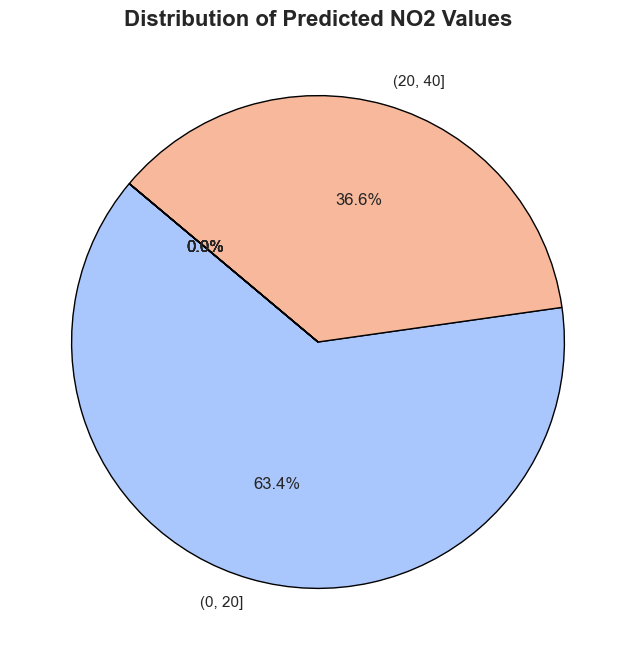

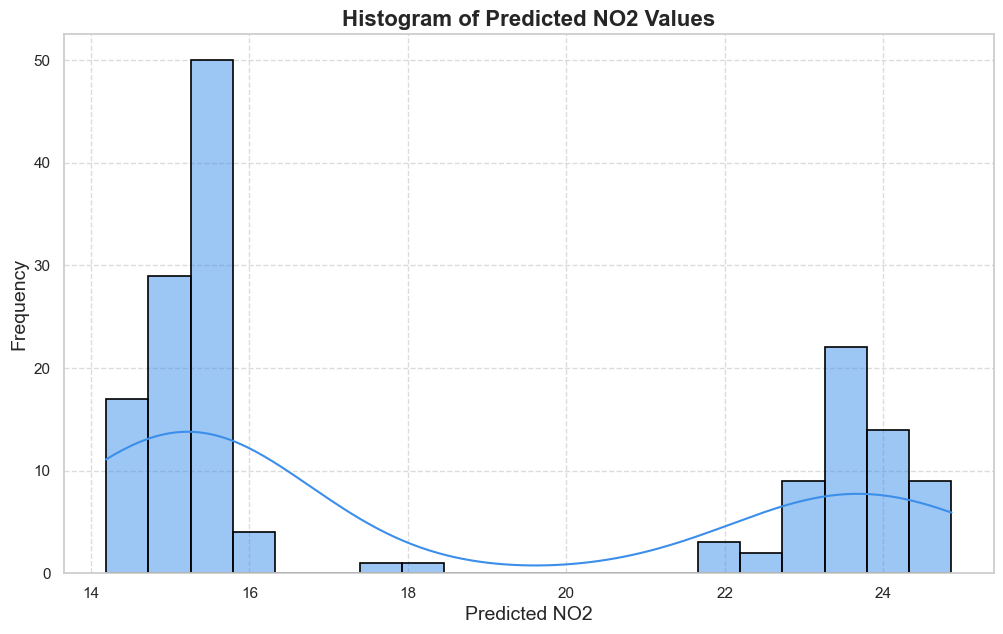

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the predicted NO2 data
final_merged_dataset = pd.read_csv('final_predictions.csv')

# Set a general style for the plots
sns.set(style="whitegrid", palette="pastel")

# Pie chart - Distribution of NO2 values
plt.figure(figsize=(10, 8))
no2_bins = pd.cut(final_merged_dataset['Predicted_NO2'], bins=[0, 20, 40, 60, 80, 100, 120, 140, 160])
no2_bins.value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(no2_bins.unique())),
                                 startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Distribution of Predicted NO2 Values', fontsize=16, fontweight='bold')
plt.ylabel('')  # Hide y-axis label
plt.show()

# Histogram - Frequency of NO2 values
plt.figure(figsize=(12, 7))
sns.histplot(final_merged_dataset['Predicted_NO2'], bins=20, kde=True, color='#3B8EEA', edgecolor='black', linewidth=1.2)
plt.title('Histogram of Predicted NO2 Values', fontsize=16, fontweight='bold')
plt.xlabel('Predicted NO2', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




In [26]:
pip install pandas matplotlib seaborn


In [27]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/final_predictions1.csv')

# Check the first few rows of the dataframe
print(df.head())


         Date           City  Predicted_NO2
0  2022-01-01  Greater Noida      46.163164
1  2022-01-02  Greater Noida      52.173303
2  2022-01-03  Greater Noida      52.437407
3  2022-01-04  Greater Noida      53.551597
4  2022-01-05  Greater Noida      53.649178
